In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#From
#https://www.kaggle.com/lucidlenn/sloan-digital-sky-survey
sdss=pd.read_csv('/Users/sdodelso/AI_Institute/Course/Skyserver_SQL2_27_2018 6_51_39 PM.csv')

In [3]:
sdss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [4]:
## Convert class column to integer
sdss["class"]=np.where(sdss["class"]=='QSO','2',sdss["class"])#.astype(int)
sdss["class"]=np.where(sdss["class"]=='STAR','0',sdss["class"])#.astype(int)
sdss["class"]=np.where(sdss["class"]=='GALAXY','1',sdss["class"])#.astype(int)
sdssc=sdss.astype({'class':int})
sdssc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  int64  
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(8)
memory usage: 1.4 MB


In [5]:
sdssc.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.669800,0.143726,1460.986400,52943.533300,353.069400
std,0.000000e+00,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.625465,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,0.000000,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000000,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,1.000000,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,1.000000,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,2.000000,5.353854,8410.000000,57481.000000,1000.000000


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler #scale the data
##Save redshift and get rid of irrelevant columns
y=sdssc["redshift"]
X=sdssc.drop(columns=["mjd","redshift","plate","fiberid","specobjid","field","camcol","run","rerun","objid","ra","dec"],axis=1)
## Get the galaxies and a training/tes set
galaxies_tmp=X[X["class"]==1]
galaxies_redshift=y[X["class"]==1]
galaxies=galaxies_tmp.drop(columns=["class"])
X_train,X_test,y_train,y_test=train_test_split(galaxies,galaxies_redshift,random_state=1,train_size=0.8)
np.shape(X_train)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test) # use the mean and std from the training data, never the test data
X_train.shape

(3998, 5)

<AxesSubplot:xlabel='ra', ylabel='dec'>

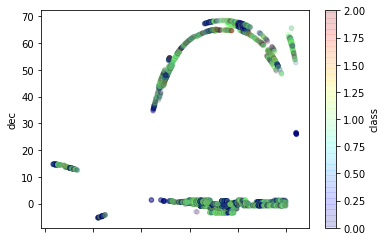

In [7]:
#Visualize the data
sdssc.plot(kind="scatter",x="ra",y="dec",c="class",alpha=0.1,cmap=plt.get_cmap("jet"),colorbar=True)

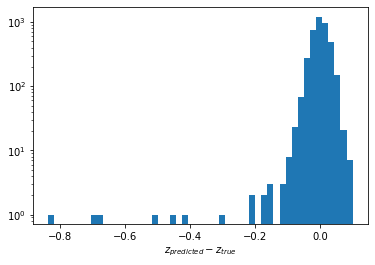

Score= 0.3225305892698689


'The coefficient R^2 is defined as (1-u/v), where u is the residual \nsum of squares ((y_true - y_pred) ** 2).sum() and v is the total sum \nof squares ((y_true - y_true.mean()) ** 2).sum()'

In [8]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
result=lin_reg.fit(X_train,y_train)
plt.hist(lin_reg.predict(X_train)-y_train,bins=50)
plt.xlabel('$z_{predicted}-z_{true}$')
plt.yscale('log')
plt.show()
##There are a variety of scores one can use.
## The simplest is the one in the method:
print('Score= '+str(lin_reg.score(X_train,y_train)))
'''The coefficient R^2 is defined as (1-u/v), where u is the residual 
sum of squares ((y_true - y_pred) ** 2).sum() and v is the total sum 
of squares ((y_true - y_true.mean()) ** 2).sum()'''


In [9]:
### Some of its attributes
coeff=result.coef_
print((coeff),coeff.sum())

[-0.03485078  0.12094444 -0.00598651 -0.06422836 -0.00725455] 0.008624228010117918


A large value of magnitude means a fainter galaxy, one more likely to be at high redshift.
The sum of all weights is positive, which tends in this direction, and it weights the infrared bands negatively, meaning objects that are redder are at higher redshift, which makes sense. The largest weights are g and i, so maybe we will see that simply by looking at g-i vs. g 

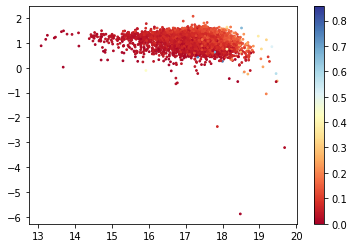

In [10]:
g=galaxies['g']
i=galaxies['i']
cm = plt.cm.get_cmap('RdYlBu')
sc=plt.scatter(g,g-i,c=galaxies_redshift,s=3, cmap=cm)
#plt.scatter(xy, xy, c=z, vmin=0, vmax=20, s=35, cmap=cm)
plt.colorbar(sc)

There are some really weird colors.

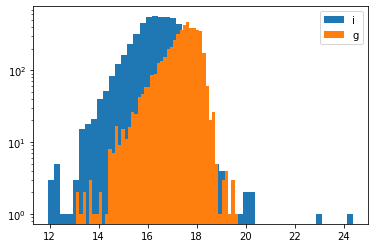

In [11]:
plt.hist(i,bins=50,label='i')
plt.hist(g,bins=50,label='g')
plt.yscale('log')
plt.legend()
plt.show()

In [12]:
#Remove outliers
galaxies_tmp=X[X["class"]==1]
galaxies_1=galaxies_tmp[galaxies_tmp["i"]<=22]
galaxies_redshift_tmp=y[X["class"]==1]
galaxies_redshift=galaxies_redshift_tmp[X["i"]<=22]
galaxies=galaxies_1.drop(columns=["class"])
X_train,X_test,y_train,y_test=train_test_split(galaxies,galaxies_redshift,random_state=1,train_size=0.8)
np.shape(X_train)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test) # use the mean and std from the training data, never the test data
X_train.shape

(3996, 5)

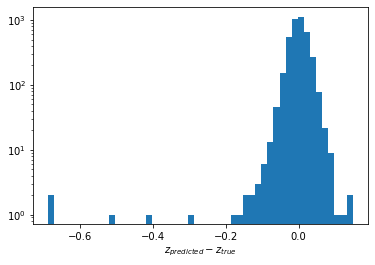

Score= 0.4299201442854478


'much better score'

In [13]:
lin_reg=LinearRegression()
result=lin_reg.fit(X_train,y_train)
plt.hist(lin_reg.predict(X_train)-y_train,bins=50)
plt.xlabel('$z_{predicted}-z_{true}$')
plt.yscale('log')
plt.show()
##There are a variety of scores one can use.
## The simplest is the one in the method:
print('Score= '+str(lin_reg.score(X_train,y_train)))
'''much better score'''


Score= 0.4299201442854478
Test Score= 0.19569279617497048


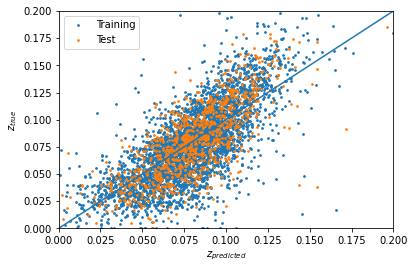

In [14]:
plt.scatter(lin_reg.predict(X_train),y_train,s=3,label='Training')
plt.scatter(lin_reg.predict(X_test),y_test,s=3,label='Test')
plt.xlabel('$z_{predicted}$')
plt.ylabel('$z_{true}$')
plt.legend()
plt.axis([0,.2,0,.2])
plt.plot([0,0.2],[0,.2])
print('Score= '+str(lin_reg.score(X_train,y_train)))
print('Test Score= '+str(lin_reg.score(X_test,y_test)))


Let's try a more aggressive set of cuts

In [16]:
#Remove outliers
galaxies_tmp=X[X["class"]==1]
galaxies_1=galaxies_tmp[galaxies_tmp["i"]<=19]
galaxies_redshift_tmp=y[X["class"]==1]
galaxies_redshift=galaxies_redshift_tmp[galaxies_tmp["i"]<=19]
galaxies=galaxies_1.drop(columns=["class"])
X_train,X_test,y_train,y_test=train_test_split(galaxies,galaxies_redshift,random_state=1,train_size=0.8)
np.shape(X_train)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test) # use the mean and std from the training data, never the test data
X_train.shape

(3991, 5)

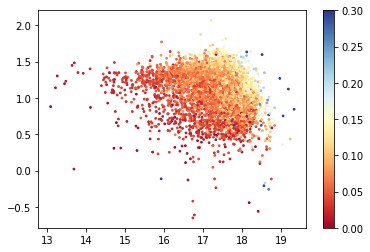

In [23]:
g=galaxies_1['g']
i=galaxies_1['i']
cm = plt.cm.get_cmap('RdYlBu')
sc=plt.scatter(g,g-i,c=galaxies_redshift,s=3, vmin=0, vmax=.3, cmap=cm)
#plt.scatter(xy, xy, c=z, vmin=0, vmax=20, s=35, cmap=cm)
plt.colorbar(sc)

looks much better

Text(0, 0.5, '$z_{predicted}-z_{true}$')

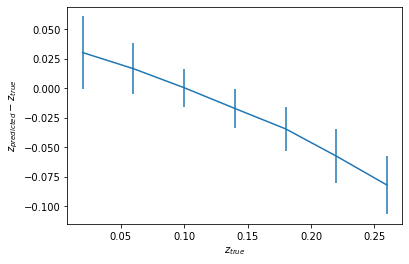

In [19]:
diff=lin_reg.predict(X_train)-y_train
# Bin in true redshift
bins=[-.001]
for x in np.arange(.02,.3,.04):
    bins.append(x)
bins=np.array(bins)
nbins=np.size(bins)
indices=np.digitize(y_train,bins)
# now each sample has an index corresponding to its true redshift
bmean=np.zeros(nbins)
bstd=np.zeros(nbins)
for i in range(nbins):
    bmean[i]=np.mean(diff[indices==i])
    bstd[i]=np.std(diff[indices==i])
plt.errorbar(bins,bmean,yerr=bstd,label='Training')
plt.xlabel('$z_{true}$')
plt.ylabel('$z_{predicted}-z_{true}$')

Text(0.5, 0, 'True Redshift')

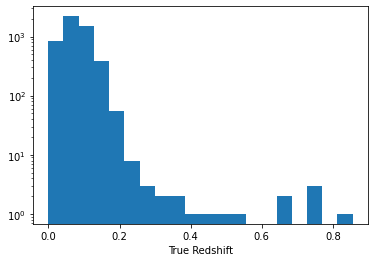

In [22]:
#Still has the drift. Look at the redshift distribution
plt.hist(galaxies_redshift,bins=20)
plt.yscale('log')
plt.xlabel('True Redshift')

In [ ]:
#Look at the predictions for all th